<h1>Tutorial 1 - Point Processing </h1>

Point processing is a computer vision technique used to improve or modify an image's visual elements, such as brightness, contrast, and color. Mathematical operations on the image's pixel values are applied to images in order to achieve the intended result. <br></br> In this tutorial we will go through some methods used in point processing.

<h4>Import Statements</h4>

In [1]:
# pip install opencv-contrib-python

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

cv2.__version__

'4.7.0'

<h2>Exercise 1 </h2>

Create a function where you can load any image you want. The function should divide the image into four equal segments. 

`Using cv2.imshow('image',img);`

display the image into the 4 separate segments. To crop specific parts of an image you can use img[0:100, 0:100]. This code will crop the image from the 0 to
100 pixels. 





In [3]:
# Load the image
img = cv2.imread('dog.jpg',0)

# Get the dimensions of the image
height, width = img.shape

# Divide the image into four equal segments
half_width = width // 2
half_height = height // 2
top_left = img[0:half_height, 0:half_width]
top_right = img[0:half_height, half_width:width]
bottom_left = img[half_height:height, 0:half_width]
bottom_right = img[half_height:height, half_width:width]

# Display each segment in a separate window
cv2.imshow('Top Left', top_left)
cv2.imshow('Top Right', top_right)
cv2.imshow('Bottom Left', bottom_left)
cv2.imshow('Bottom Right', bottom_right)

# Wait for a key press and then close all windows
cv2.waitKey(0)
cv2.destroyAllWindows()

## ↑ <u> Comments (ex.1): <u>
### The result of running this code is four separate windows displaying the top-left, top-right, bottom-left, and bottom-right segments of the original image (image is in grayscale). This is useful for analyzing the content of the image and identifying patterns or features that may not be visible when looking at the image as a whole.

<h2>Exercise 2</h2>

For each of the segments obtained in exercise one, apply a thresholding function to identify if the segment is a dark region or a light region. You may set an arbitrary value for light and dark. (For example greater than intensity of 127 is light).


In [4]:
ret, thresh_top_left = cv2.threshold(top_left, 120, 255, cv2.THRESH_BINARY)
ret, thresh_top_right = cv2.threshold(top_right, 120, 255, cv2.THRESH_BINARY)
ret, thresh_bottom_left = cv2.threshold(bottom_left, 120, 255, cv2.THRESH_BINARY)
ret, thresh_bottom_right = cv2.threshold(bottom_right, 120, 255, cv2.THRESH_BINARY)

cv2.imshow('Top Left Binary Threshold', thresh_top_left)
cv2.imshow('Top Right Binary Threshold', thresh_top_right)
cv2.imshow('Bottom Left Binary Threshold', thresh_bottom_left)
cv2.imshow('Bottom Right Binary Threshold', thresh_bottom_right)
 
cv2.waitKey(0)
cv2.destroyAllWindows()

## ↑ <u> Comments (ex.2): <u>

### The result of running this code is four separate windows displaying the thresholded versions of each of the four segments of the original image. The binary thresholding should highlight the prominent features of each segment, making it easier to see details and patterns in the image.
    
### In the case of binary thresholding, the image is divided into two regions: pixels that are above the threshold value are set to white, while pixels that are below the threshold value are set to black. The threshold value can be chosen based on the characteristics of the image and the features that you want to extract.

### In the code, the threshold value is set to 120, and any pixel value greater than or equal to 120 will be set to 255 (white), while any pixel value less than 120 will be set to 0 (black). By applying this threshold to each of the four segments of the original image, the resulting thresholded images highlight the prominent features of each segment, making it easier to see details and patterns.

<h2>Exercise 3</h2>

Now that you have identified which segments in your image are light or dark. Generate a histogram (between 0 and 255 using bins of 1) for each segment. Compare the segments using the histograms.

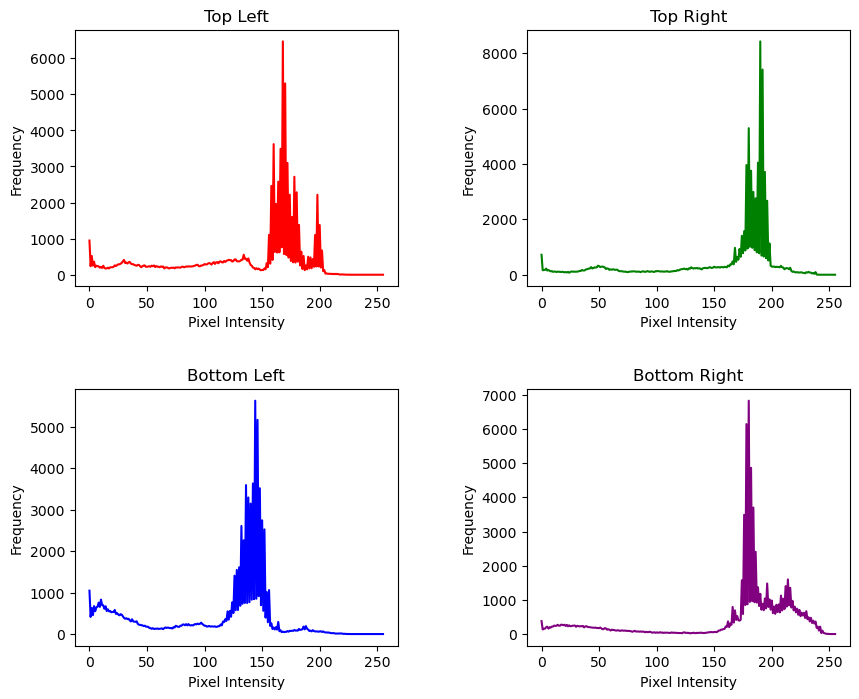

In [5]:
def calc_histogram(img):
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    return hist.flatten()

# Calculate histograms for each segment
hist_top_left = calc_histogram(top_left)
hist_top_right = calc_histogram(top_right)
hist_bottom_left = calc_histogram(bottom_left)
hist_bottom_right = calc_histogram(bottom_right)

# Display the histograms
plt.figure(figsize=(10, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Add some extra space between the subplots
plt.subplot(2, 2, 1), plt.plot(range(256), hist_top_left, color='red'), plt.title('Top Left')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.subplot(2, 2, 2), plt.plot(range(256), hist_top_right, color='green'), plt.title('Top Right')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.subplot(2, 2, 3), plt.plot(range(256), hist_bottom_left, color='blue'), plt.title('Bottom Left')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.subplot(2, 2, 4), plt.plot(range(256), hist_bottom_right, color='purple'), plt.title('Bottom Right')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

## ↑ <u> Comments (ex.3): <u>
### The result of running this code is a single figure with four subplots, each representing one of the four segments of the original image. The histograms show the distribution of pixel intensities in each segment, with the x-axis representing the pixel intensity values (ranging from 0 to 255) and the y-axis representing the frequency of occurrence of each pixel intensity value. By examining the histograms, you can gain insight into the distribution of pixel intensities in the image and the relative amounts of light and dark regions in each segment.

<h2>Exercise 4</h2>

Power transform can be used to darken or lighten an image. Create a function that applies power transform to an image. Your function should allow for variability in the value Gamma. Load the segments from the previous exercises and apply power transform to lighten the segments or darken the segments. Compare the transformed segment with the normal segment using histograms.

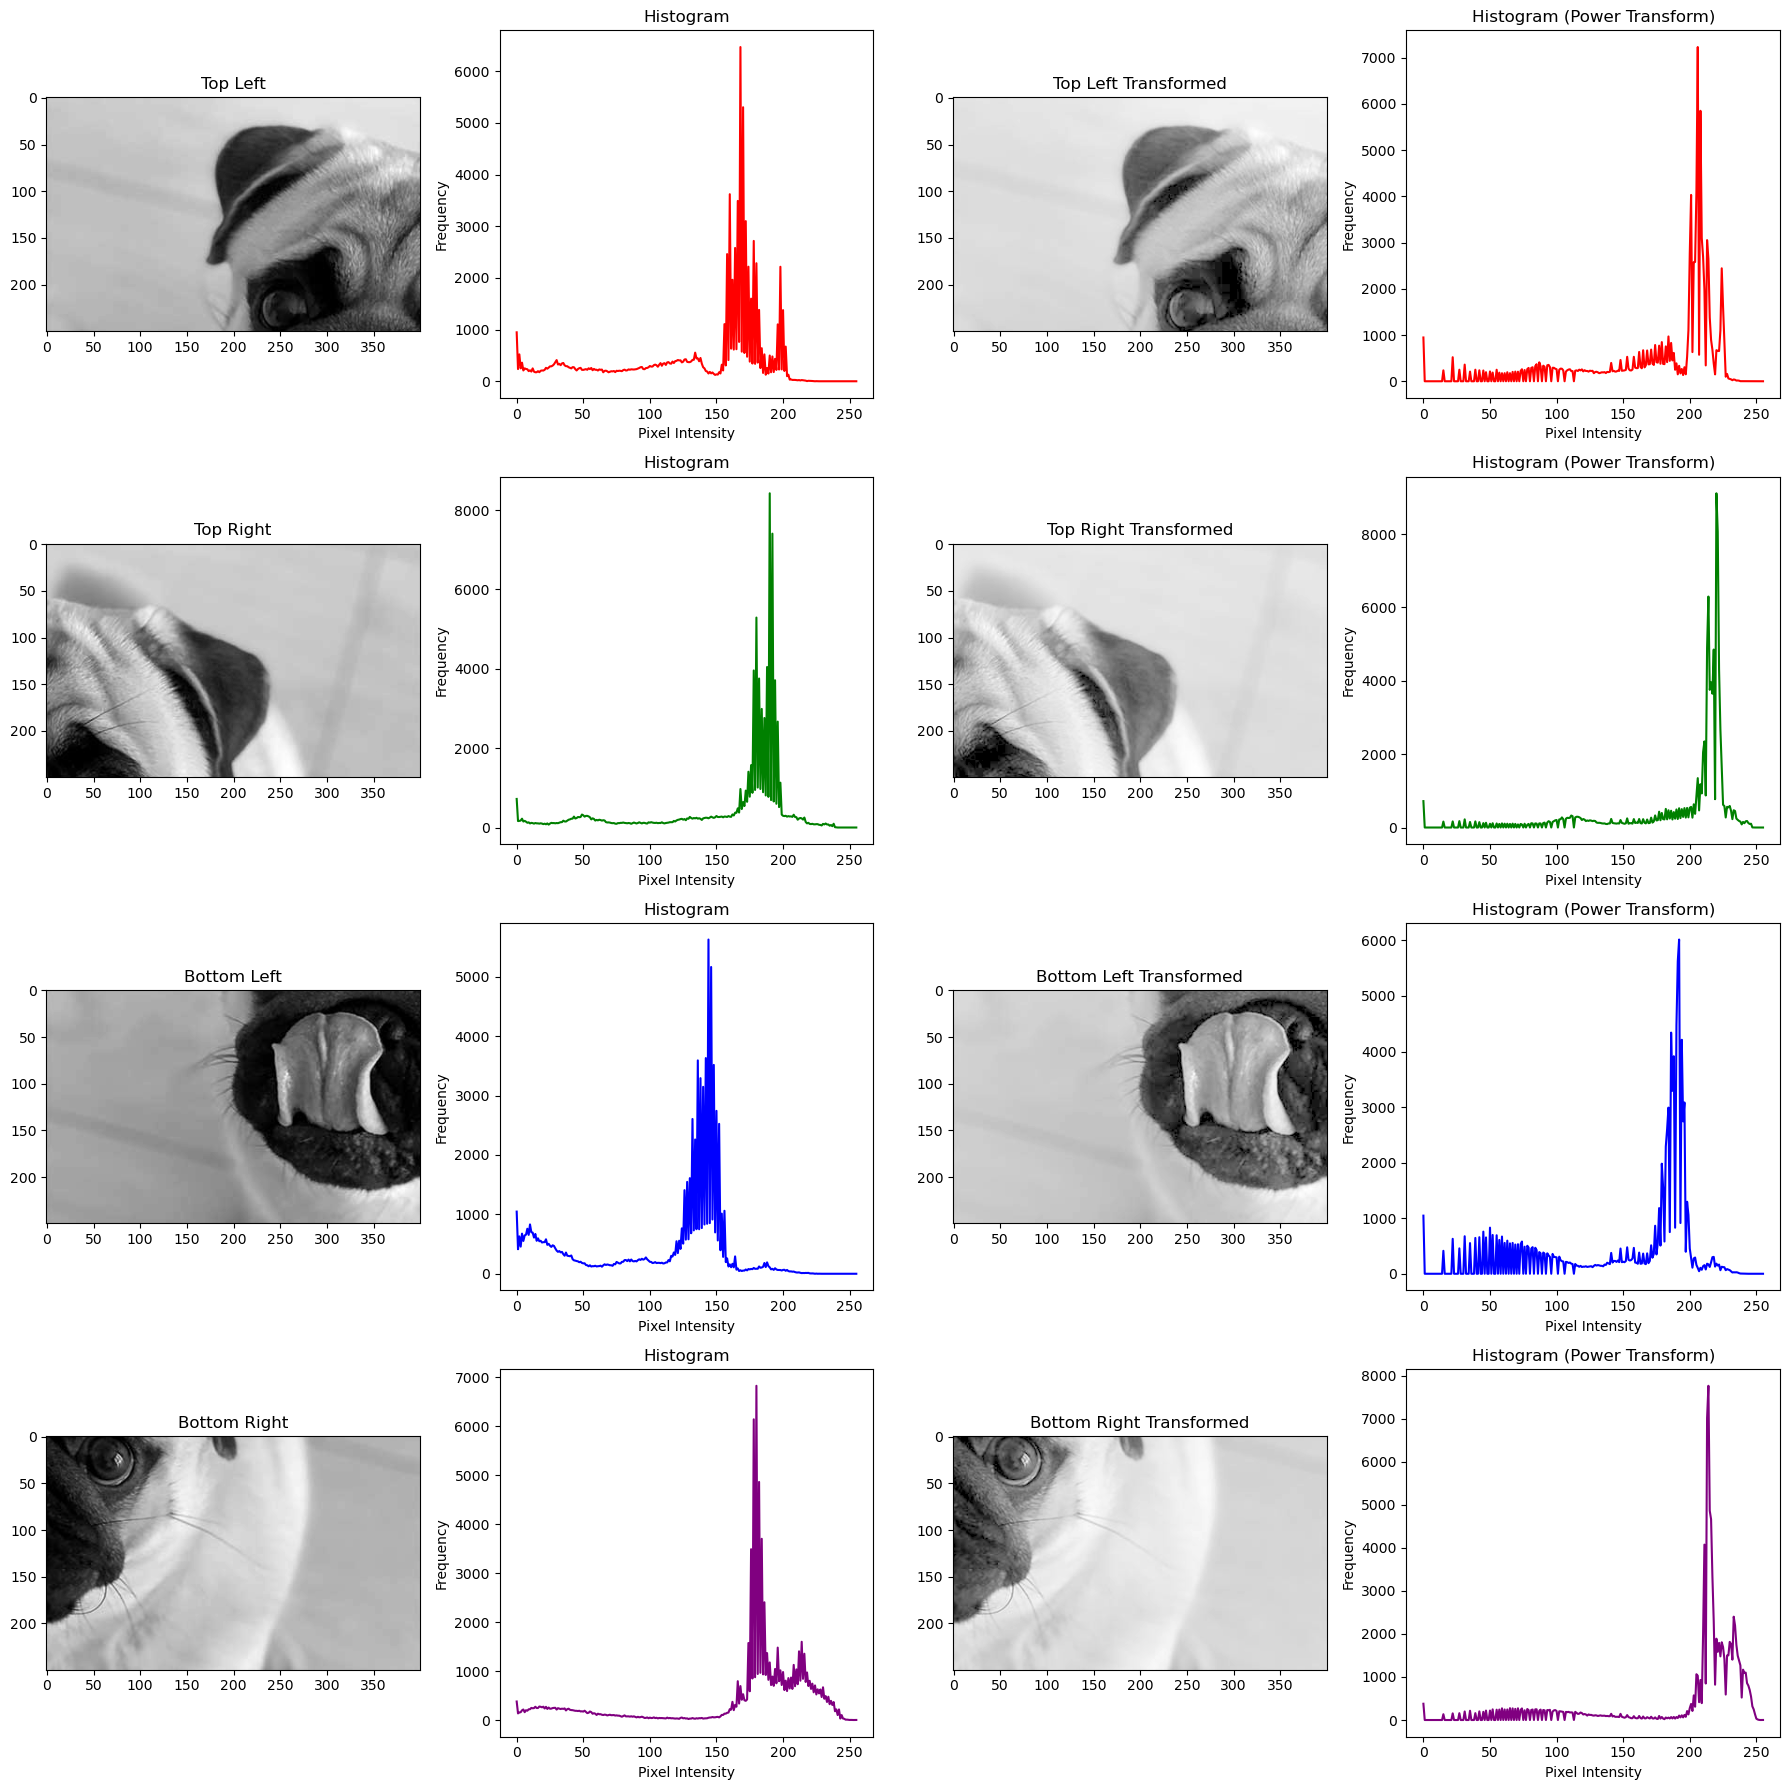

In [6]:
def power_transform(img, gamma):
    # Normalize the pixel values between 0 and 1
    img_norm = img / 255.0
    
    # Apply the power transform
    img_power = np.power(img_norm, gamma)
    
    # Convert back to the original scale
    img_power = np.uint8(img_power * 255)
    
    return img_power

# Apply power transform to each segment
gamma = 0.5
top_left_power = power_transform(top_left, gamma)
top_right_power = power_transform(top_right, gamma)
bottom_left_power = power_transform(bottom_left, gamma)
bottom_right_power = power_transform(bottom_right, gamma)

# Calculate histograms for the original and transformed segments
hist_top_left = calc_histogram(top_left)
hist_top_left_power = calc_histogram(top_left_power)
hist_top_right = calc_histogram(top_right)
hist_top_right_power = calc_histogram(top_right_power)
hist_bottom_left = calc_histogram(bottom_left)
hist_bottom_left_power = calc_histogram(bottom_left_power)
hist_bottom_right = calc_histogram(bottom_right)
hist_bottom_right_power = calc_histogram(bottom_right_power)

# Display the original and transformed segments with their histograms
plt.figure(figsize=(18, 18))
plt.subplot(4, 4, 1), plt.imshow(top_left, cmap='gray'), plt.title('Top Left')
plt.subplot(4, 4, 2), plt.plot(range(256), hist_top_left, color='red'), plt.title('Histogram')
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.subplot(4, 4, 3), plt.imshow(top_left_power, cmap='gray'), plt.title('Top Left Transformed')
plt.subplot(4, 4, 4), plt.plot(range(256), hist_top_left_power, color='red'), plt.title('Histogram (Power Transform)')
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')

plt.subplot(4, 4, 5), plt.imshow(top_right, cmap='gray'), plt.title('Top Right')
plt.subplot(4, 4, 6), plt.plot(range(256), hist_top_right, color='green'), plt.title('Histogram')
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.subplot(4, 4, 7), plt.imshow(top_right_power, cmap='gray'), plt.title('Top Right Transformed')
plt.subplot(4, 4, 8), plt.plot(range(256), hist_top_right_power, color='green'), plt.title('Histogram (Power Transform)')
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')

plt.subplot(4, 4, 9), plt.imshow(bottom_left, cmap='gray'), plt.title('Bottom Left')
plt.subplot(4, 4, 10), plt.plot(range(256), hist_bottom_left, color='blue'), plt.title('Histogram')
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.subplot(4, 4, 11), plt.imshow(bottom_left_power, cmap='gray'), plt.title('Bottom Left Transformed')
plt.subplot(4, 4, 12), plt.plot(range(256), hist_bottom_left_power, color='blue'), plt.title('Histogram (Power Transform)')
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')

plt.subplot(4, 4, 13), plt.imshow(bottom_right, cmap='gray'), plt.title('Bottom Right')
plt.subplot(4, 4, 14), plt.plot(range(256), hist_bottom_right, color='purple'), plt.title('Histogram')
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.subplot(4, 4, 15), plt.imshow(bottom_right_power, cmap='gray'), plt.title('Bottom Right Transformed')
plt.subplot(4, 4, 16), plt.plot(range(256), hist_bottom_right_power, color='purple'), plt.title('Histogram (Power Transform)')
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## ↑ <u> Comments (ex.4): <u>
### This code applies a power transform to each of the four segments of an image. The power transform, also known as gamma correction, is a nonlinear image processing technique that can be used to adjust the contrast of an image. It works by raising the pixel intensities of an image to a specified power value, called the gamma value.

### The gamma value determines the amount of contrast adjustment in the image. For example, a gamma value of 1.0 will result in no change to the image, while a gamma value greater than 1.0 will increase the contrast, making the image appear brighter and more vivid. The gamma value of 0.5 used in the 'power_transform' function in the given code is a relatively low value, which means that the transformation will increase the brightness of the darker regions of the image more than the brighter regions. A gamma value less than 1.0 will result in a loss of contrast in the image, making the darker regions of the image appear brighter and the brighter regions appear darker.
    
### The code then generates a plot that displays the original segments, their histograms, the transformed segments, and their histograms.By examining the histograms, you can gain insights into the distribution of pixel intensities in each segment and the relative amounts of light and dark regions in each segment. For example, a histogram with a peak at the left end of the x-axis indicates that most of the pixels in the image have low intensity values, while a histogram with a peak at the right end of the x-axis indicates that most of the pixels in the image have high intensity values.

### Overall, the plot generated by the code provides a visual representation of the power transform and its effect on the distribution of pixel intensities in an image. It can be useful for understanding how different image processing techniques affect the visual appearance of an image.

<h2>Exercise 5</h2>

Repeat the previous exercise but replace the Power Transform function with bitwise-splicing.

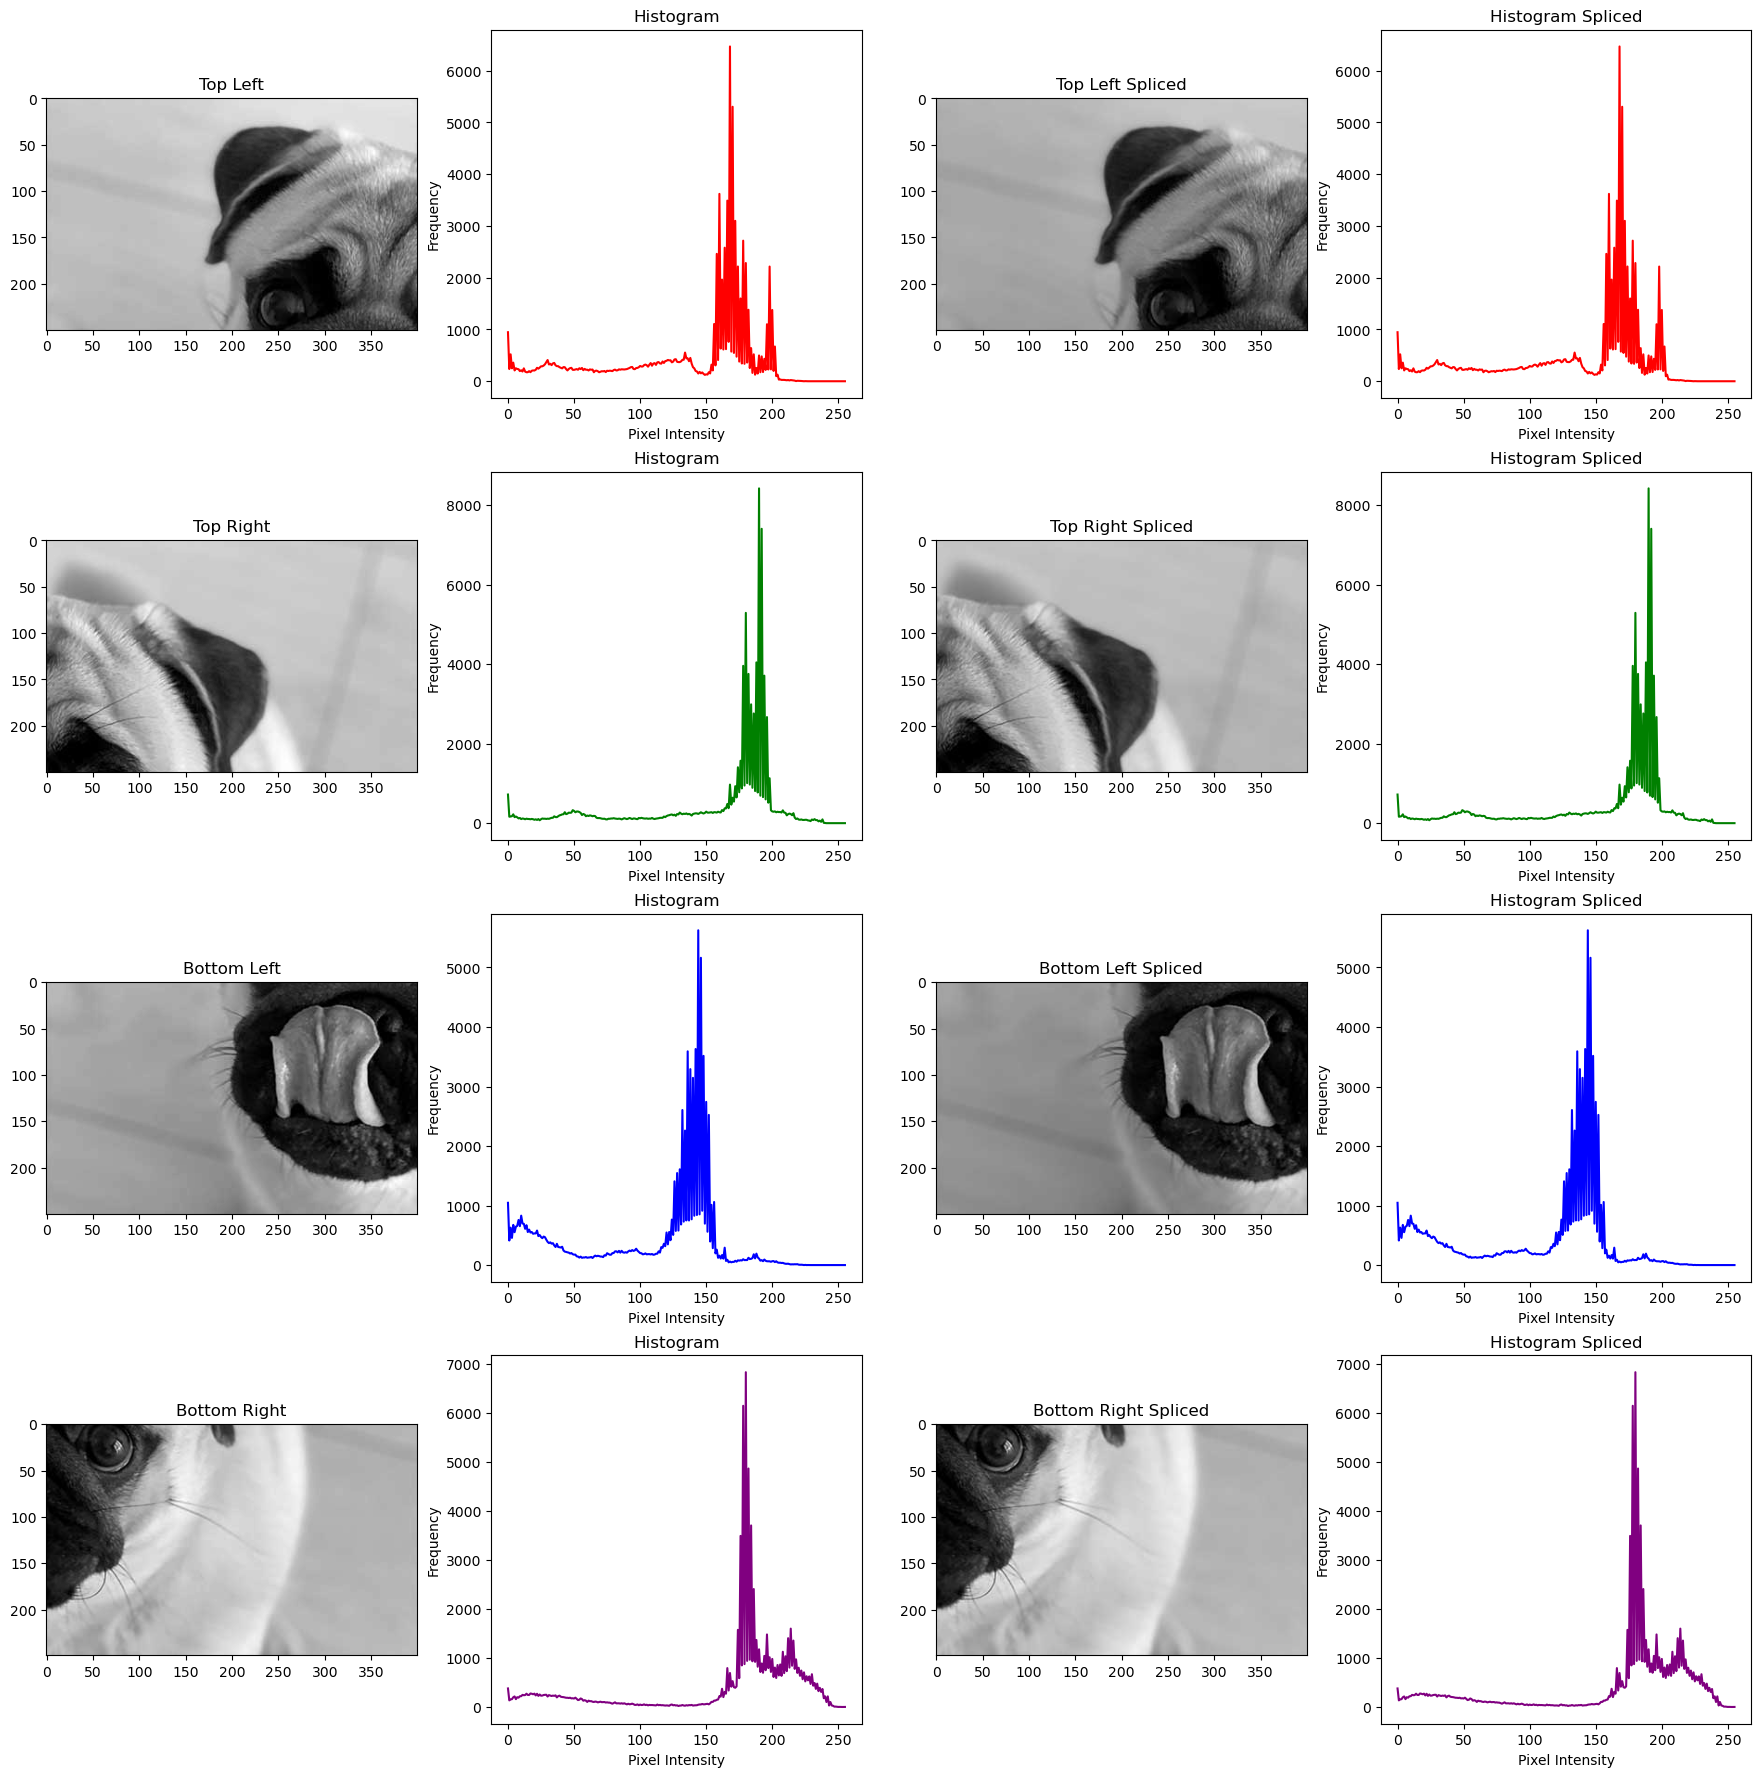

In [7]:
# Convert the grayscale image to a 3-channel color image
img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Split the color image into its color channels
b, g, r = cv2.split(img_color)

def bitwise_splicing(img, mask):
    # Convert the grayscale image to a 3-channel color image
    img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    
    # Split the color image into its color channels
    b, g, r = cv2.split(img_color)
    
    # Convert each pixel value into an 8-bit binary string
    b_bin = np.array([list('{0:08b}'.format(pV)) for row in b for pV in row], dtype=np.uint8)
    g_bin = np.array([list('{0:08b}'.format(pV)) for row in g for pV in row], dtype=np.uint8)
    r_bin = np.array([list('{0:08b}'.format(pV)) for row in r for pV in row], dtype=np.uint8)
    
    # Create a new pixel value by splicing the binary strings using the mask
    new_b = np.packbits(np.array([b_bin[:, i] if mask[i] else np.zeros_like(b_bin[:, i]) for i in range(8)]).T)
    new_g = np.packbits(np.array([g_bin[:, i] if mask[i] else np.zeros_like(g_bin[:, i]) for i in range(8)]).T)
    new_r = np.packbits(np.array([r_bin[:, i] if mask[i] else np.zeros_like(r_bin[:, i]) for i in range(8)]).T)
    
    # Merge the color channels back into an image
    new_img = cv2.merge((new_b.reshape(b.shape), new_g.reshape(g.shape), new_r.reshape(r.shape)))
    
    return new_img

# Define the mask
mask = '11110000'

# Apply bitwise splicing to each segment
top_left_spliced = bitwise_splicing(top_left, mask)
top_right_spliced = bitwise_splicing(top_right, mask)
bottom_left_spliced = bitwise_splicing(bottom_left, mask)
bottom_right_spliced = bitwise_splicing(bottom_right, mask)

# Calculate histograms for the original and spliced segments
hist_top_left = calc_histogram(top_left)
hist_top_left_spliced = calc_histogram(top_left_spliced)
hist_top_right = calc_histogram(top_right)
hist_top_right_spliced = calc_histogram(top_right_spliced)
hist_bottom_left = calc_histogram(bottom_left)
hist_bottom_left_spliced = calc_histogram(bottom_left_spliced)
hist_bottom_right = calc_histogram(bottom_right)
hist_bottom_right_spliced = calc_histogram(bottom_right_spliced)

# Display the original and spliced segments with their histograms
plt.figure(figsize=(22, 22))
plt.subplot(4, 4, 1), plt.imshow(top_left, cmap='gray'), plt.title('Top Left')
plt.subplot(4, 4, 2), plt.plot(range(256), hist_top_left, color='red'), plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.subplot(4, 4, 3), plt.imshow(top_left_spliced, cmap='gray'), plt.title('Top Left Spliced')
plt.subplot(4, 4, 4), plt.plot(range(256), hist_top_left_spliced, color='red'), plt.title('Histogram Spliced')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(4, 4, 5), plt.imshow(top_right, cmap='gray'), plt.title('Top Right')
plt.subplot(4, 4, 6), plt.plot(range(256), hist_top_right, color='green'), plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.subplot(4, 4, 7), plt.imshow(top_right_spliced, cmap='gray'), plt.title('Top Right Spliced')
plt.subplot(4, 4, 8), plt.plot(range(256), hist_top_right_spliced, color='green'), plt.title('Histogram Spliced')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(4, 4, 9), plt.imshow(bottom_left, cmap='gray'), plt.title('Bottom Left')
plt.subplot(4, 4, 10), plt.plot(range(256), hist_bottom_left, color='blue'), plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.subplot(4, 4, 11), plt.imshow(bottom_left_spliced, cmap='gray'), plt.title('Bottom Left Spliced')
plt.subplot(4, 4, 12), plt.plot(range(256), hist_bottom_left_spliced, color='blue'), plt.title('Histogram Spliced')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(4, 4, 13), plt.imshow(bottom_right, cmap='gray'), plt.title('Bottom Right')
plt.subplot(4, 4, 14), plt.plot(range(256), hist_bottom_right, color='purple'), plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.subplot(4, 4, 15), plt.imshow(bottom_right_spliced, cmap='gray'), plt.title('Bottom Right Spliced')
plt.subplot(4, 4, 16), plt.plot(range(256), hist_bottom_right_spliced, color='purple'), plt.title('Histogram Spliced')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.show()

## ↑ <u> Comments (ex.5): <u>
    
### The resulting plot shows the effect of the bitwise splicing operation on the distribution of pixel intensities in each segment. The spliced segments have a different distribution of pixel intensities compared to the original segments, as indicated by the differences in the histograms.
    
### The histograms for the original and spliced segments in the given code may appear similar because the bitwise splicing operation only changes the binary representation of each pixel, rather than changing the actual pixel values.

### The bitwise splicing operation creates a new pixel value by combining the binary representation of each pixel in the color channels using a specified mask, but it does not change the overall range of pixel values or the number of pixels in each intensity bin. As a result, the distribution of pixel intensities in the spliced segments is similar to that of the original segments.

<h2>Exercise 6</h2>

Now that you have experimented with different point processing techniques and compared the results using histograms. Let’s apply these techniques tovideo (hopefully in real-time) 

<ol>
  <li>Divide the webcam frame into four equal segments</li>
  <li>Using thresholds record which segments are darker.</li>
  <li>Apply Power Transform to lighten the darker segments.</li>
  <li>Compare the results using histograms (the graph should update as the frames are loading)</li>
</ol>

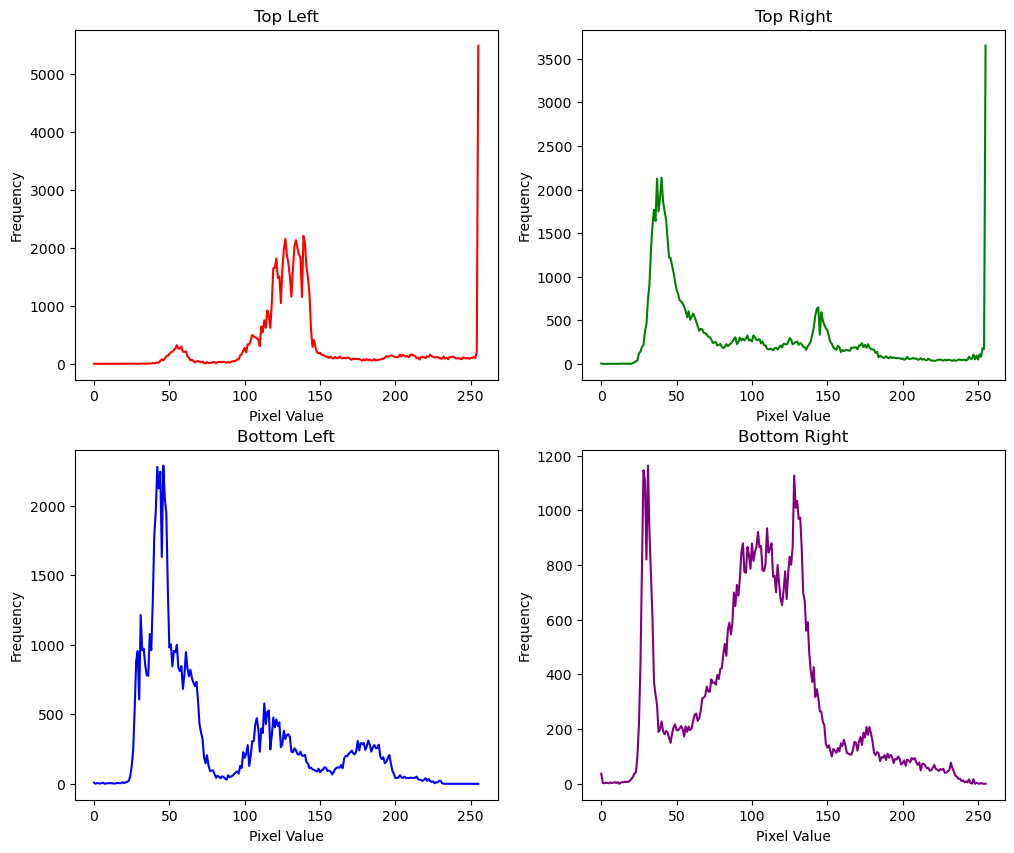

*****************************************************************************************************************************


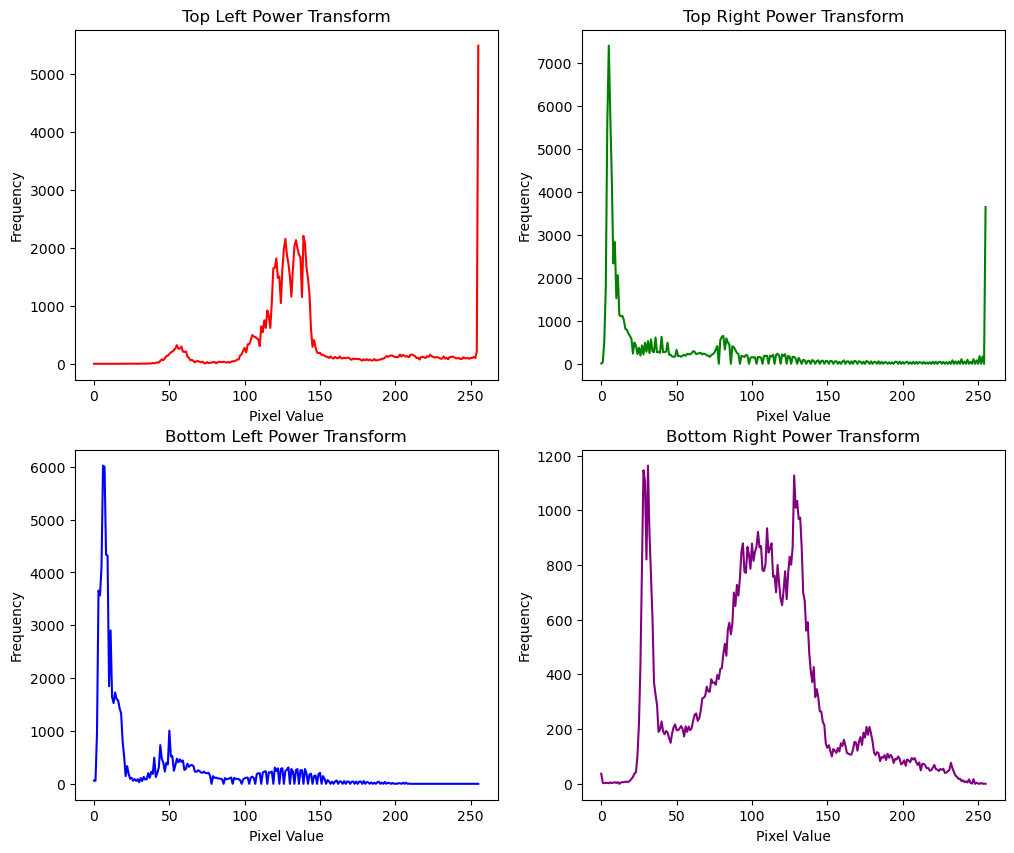

*****************************************************************************************************************************


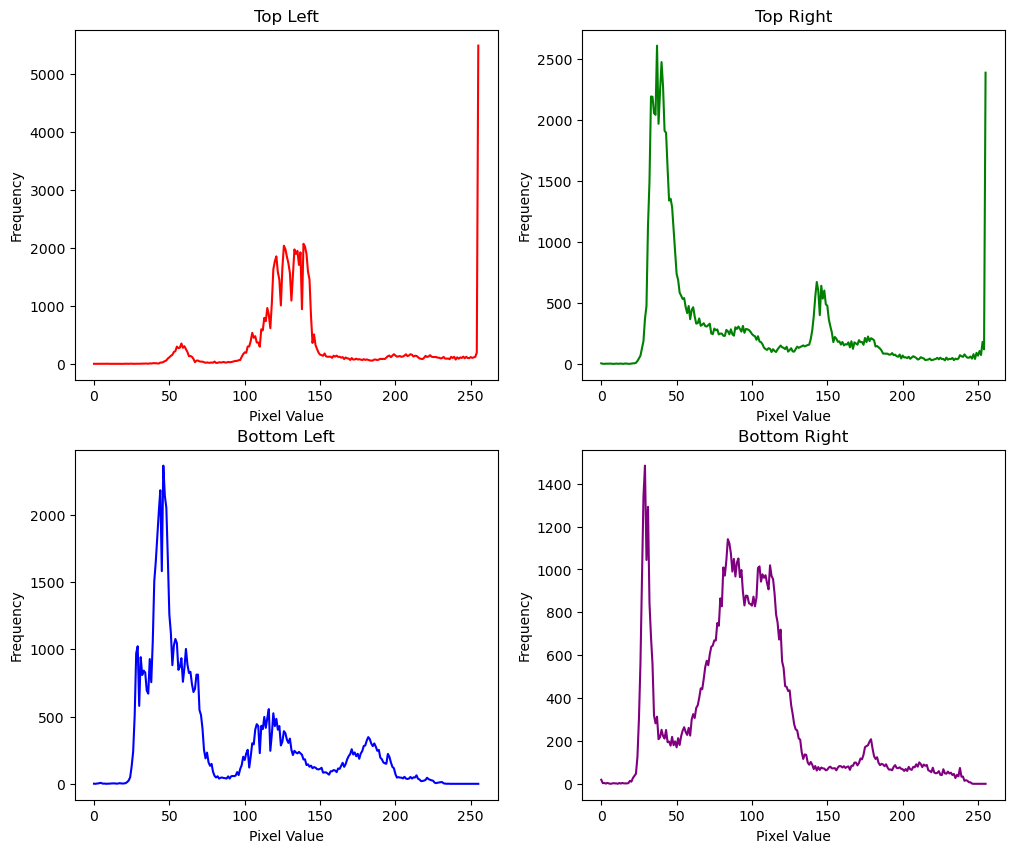

*****************************************************************************************************************************


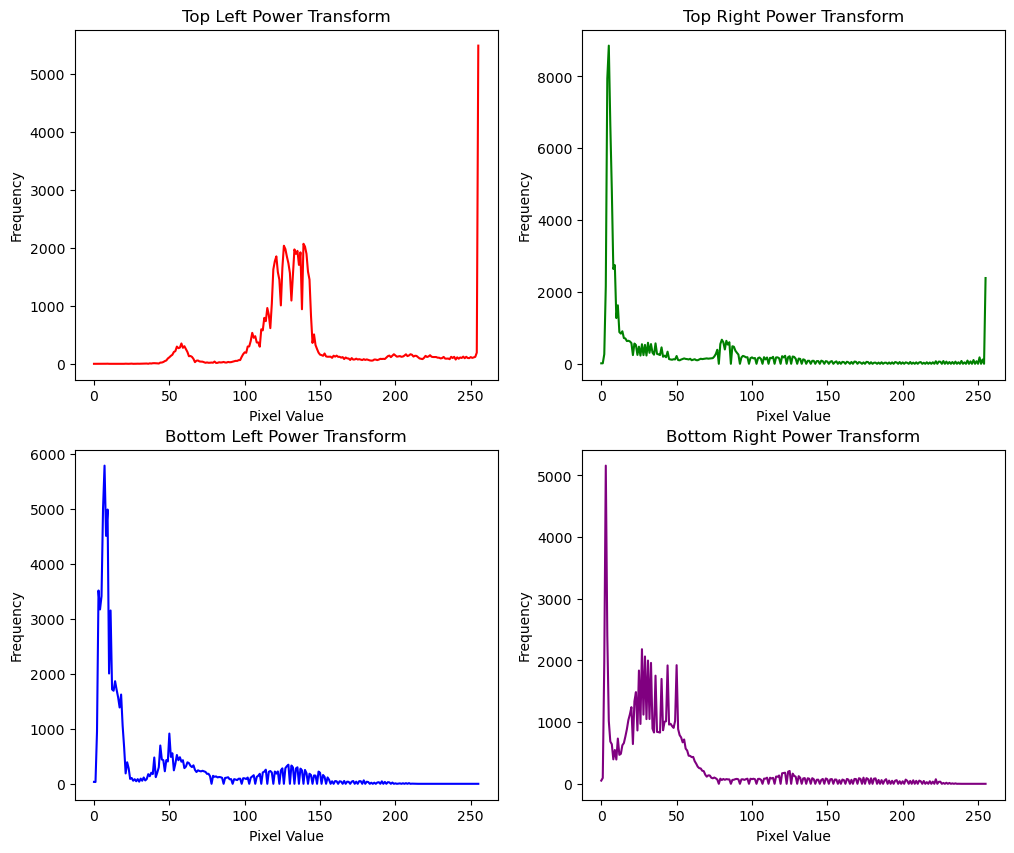

*****************************************************************************************************************************


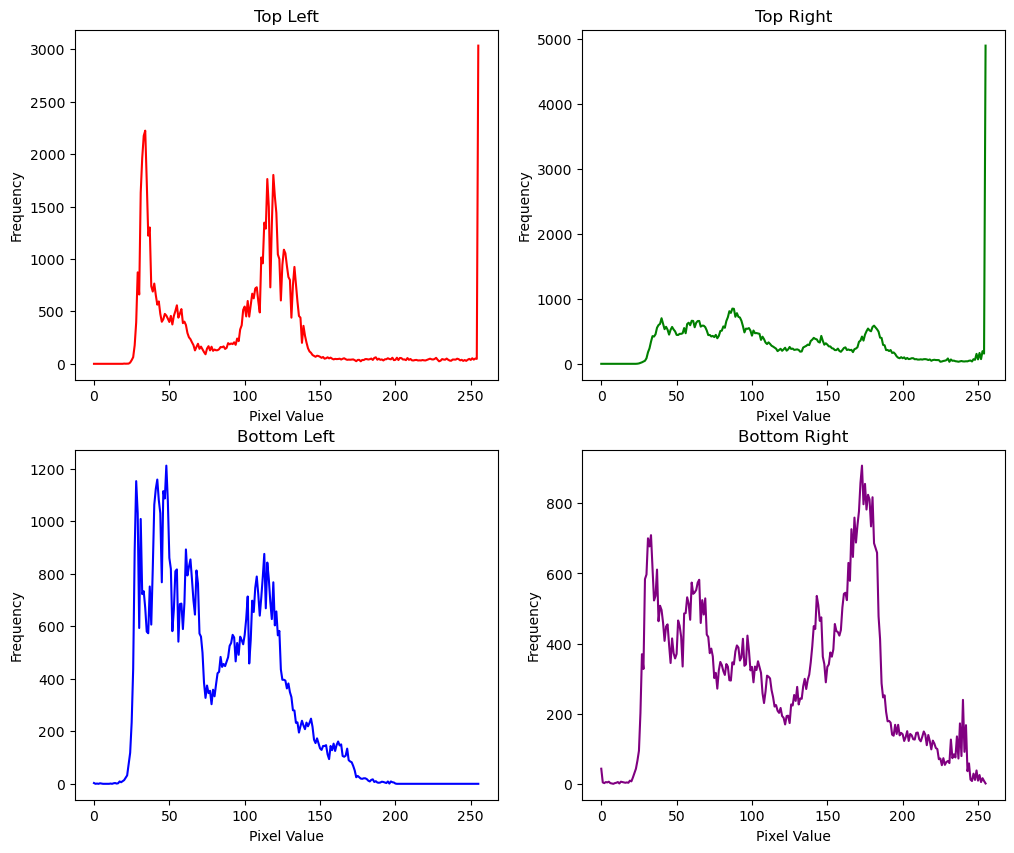

*****************************************************************************************************************************


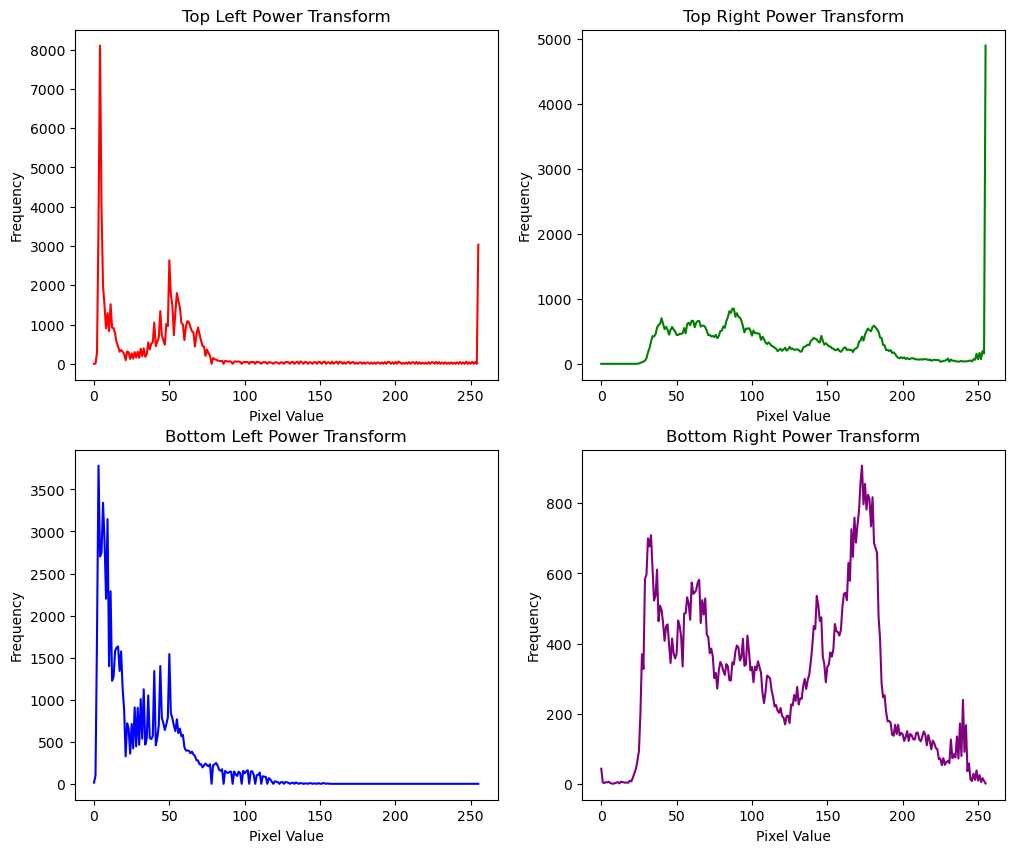

*****************************************************************************************************************************


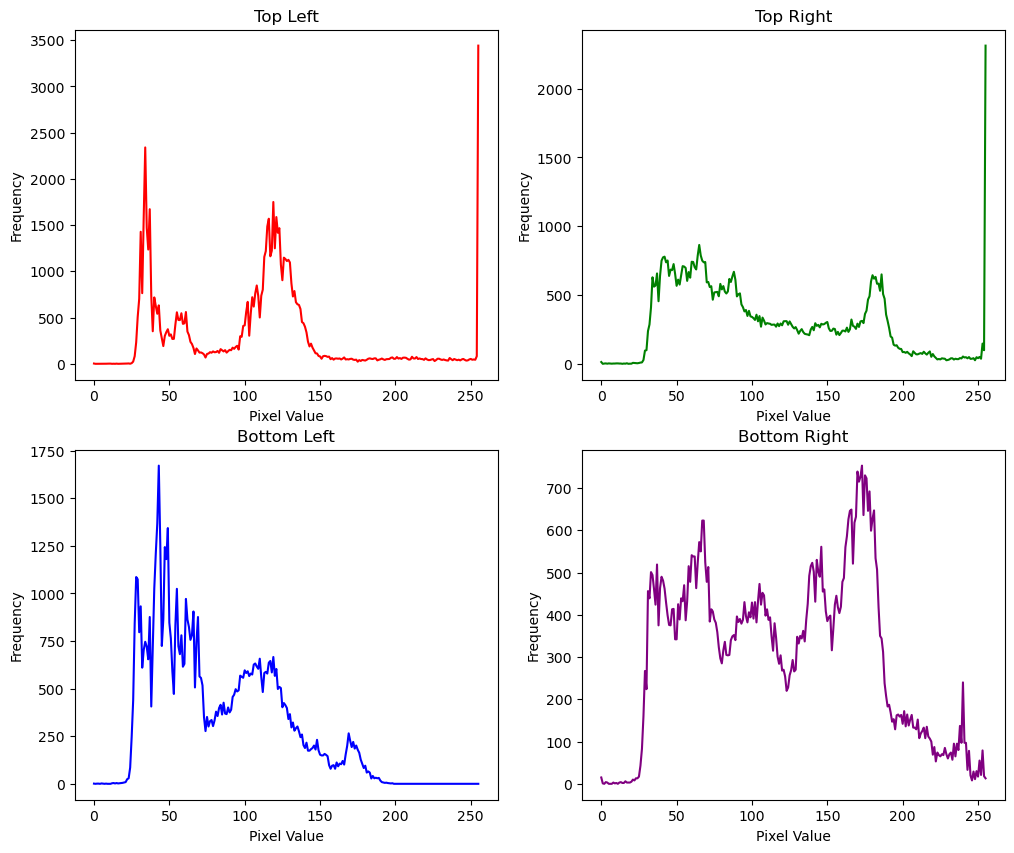

*****************************************************************************************************************************


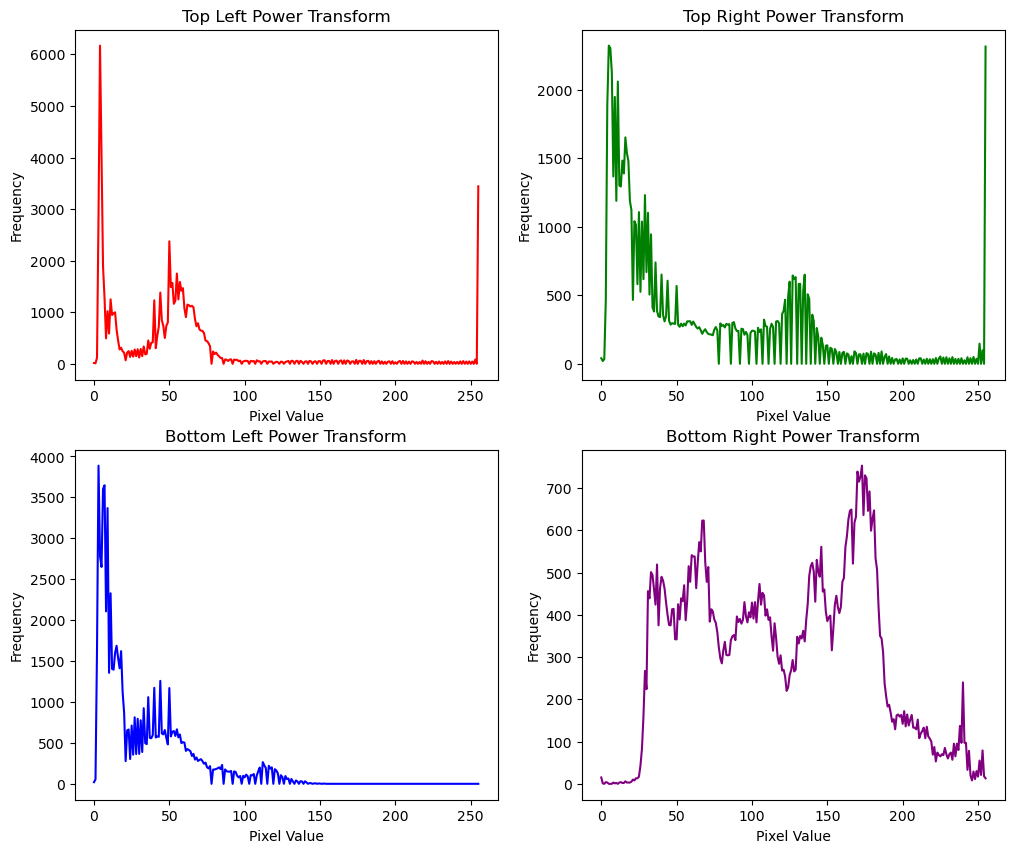

*****************************************************************************************************************************


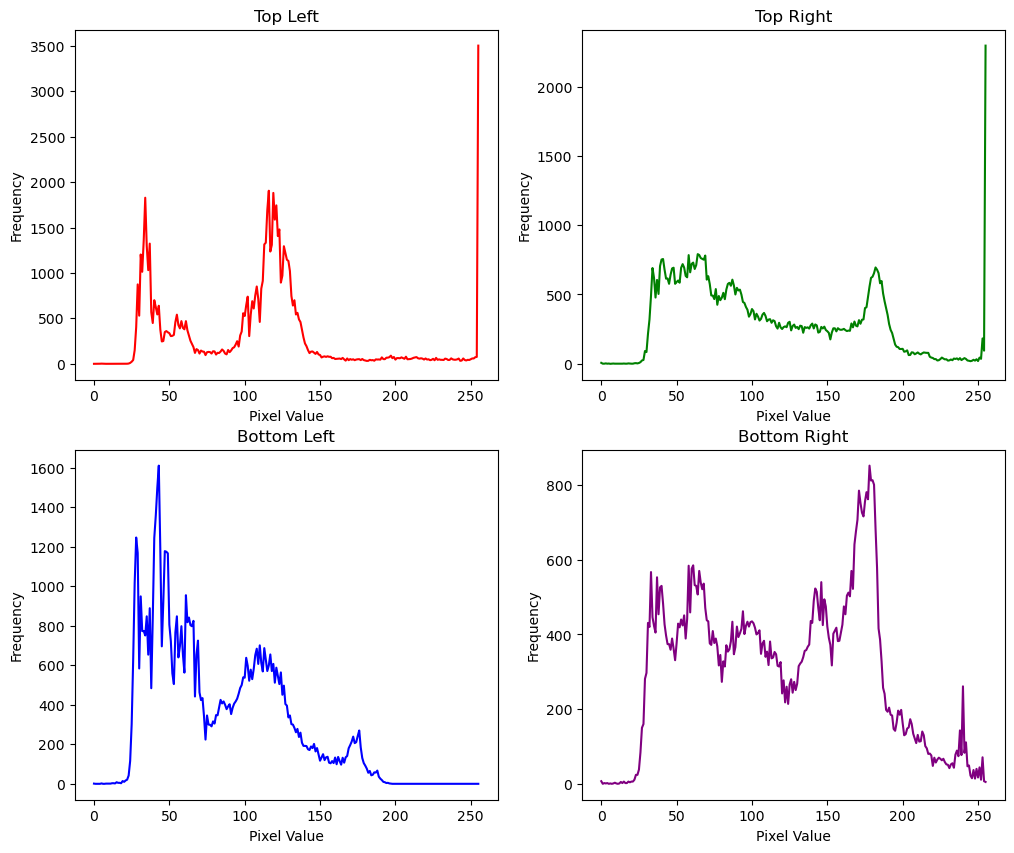

*****************************************************************************************************************************


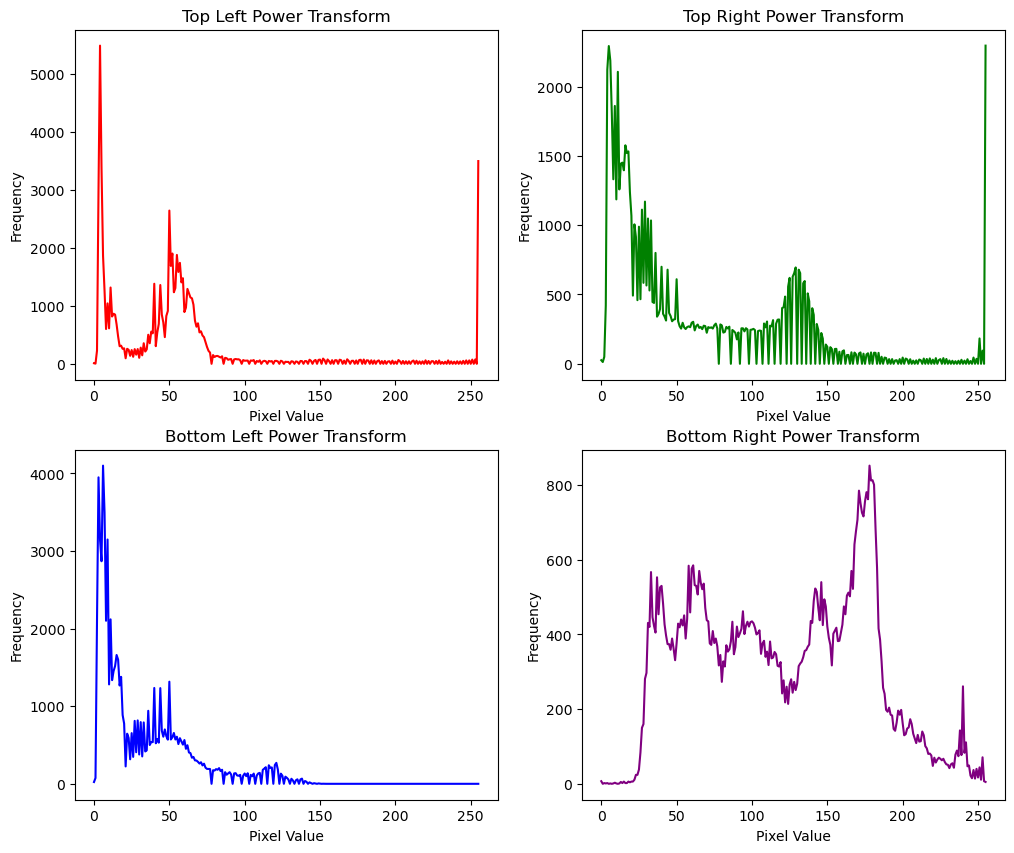

*****************************************************************************************************************************


In [8]:
def power_transform(img, gamma):
    # Normalize the pixel values between 0 and 1
    img_norm = img / 255.0
    
    # Apply the power transform
    img_power = np.power(img_norm, gamma)
    
    # Convert back to the original scale
    img_power = np.uint8(img_power * 255)
    
    return img_power

def calc_histogram(img):
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    return hist.flatten()

# Start capturing video from the default camera (index 0)
cap = cv2.VideoCapture(0)

# Loop over the video frames
while True:
    # Read the next frame from the camera
    ret, frame = cap.read()
    
    # If the frame could not be captured, break out of the loop
    if not ret:
        break
    
    # Get the dimensions of the frame
    height, width, _ = frame.shape
    
    #---------------------------------------------------------------------------
    
    # Divide the frame into four equal segments
    half_width = width // 2
    half_height = height // 2
    top_left = frame[0:half_height, 0:half_width]
    top_right = frame[0:half_height, half_width:width]
    bottom_left = frame[half_height:height, 0:half_width]
    bottom_right = frame[half_height:height, half_width:width]
    
    #---------------------------------------------------------------------------
    
    # Apply binary thresholding to each segment
    ret, thresh_top_left = cv2.threshold(top_left, 120, 255, cv2.THRESH_BINARY)
    ret, thresh_top_right = cv2.threshold(top_right, 120, 255, cv2.THRESH_BINARY)
    ret, thresh_bottom_left = cv2.threshold(bottom_left, 120, 255, cv2.THRESH_BINARY)
    ret, thresh_bottom_right = cv2.threshold(bottom_right, 120, 255, cv2.THRESH_BINARY)

    # Display the binary thresholded segments
    # cv2.imshow('Top Left Binary Threshold', thresh_top_left)
    # cv2.imshow('Top Right Binary Threshold', thresh_top_right)
    # cv2.imshow('Bottom Left Binary Threshold', thresh_bottom_left)
    # cv2.imshow('Bottom Right Binary Threshold', thresh_bottom_right)
        
    #---------------------------------------------------------------------------
    
    # Calculate histograms for each segment
    hist_top_left = calc_histogram(top_left)
    hist_top_right = calc_histogram(top_right)
    hist_bottom_left = calc_histogram(bottom_left)
    hist_bottom_right = calc_histogram(bottom_right)

    # Display the histograms for each segment
    plt.ion()
    plt.figure(figsize=(12,10))
    plt.subplot(2,2,1), plt.plot(range(256), hist_top_left, color='red'), plt.title('Top Left')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.subplot(2,2,2), plt.plot(range(256), hist_top_right, color='green'), plt.title('Top Right')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.subplot(2,2,3), plt.plot(range(256), hist_bottom_left, color='blue'), plt.title('Bottom Left')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.subplot(2,2,4), plt.plot(range(256), hist_bottom_right, color='purple'), plt.title('Bottom Right')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.pause(0.5)
    plt.show()

    print('*' * 125)  # Print a line of asterisks

    #---------------------------------------------------------------------------
    
    # If a segment is darker, lighten it using a power transform and calculate histogram for transform
    if thresh_top_left.mean() < 128:
        top_left_lightened = power_transform(top_left, 2.0)
        cv2.imshow('Top Left Lightened', top_left_lightened)
        hist_top_left = calc_histogram(top_left_lightened)
    else:
        cv2.imshow('Top Left Lightened', top_left)
        hist_top_left = calc_histogram(top_left)
        
    if thresh_top_right.mean() < 128:
        top_right_lightened = power_transform(top_right, 2.0)
        cv2.imshow('Top Right Lightened', top_right_lightened)
        hist_top_right = calc_histogram(top_right_lightened)
    else:
        cv2.imshow('Top Right Lightened', top_right)
        hist_top_right = calc_histogram(top_right)
        
    if thresh_bottom_left.mean() < 128:
        bottom_left_lightened = power_transform(bottom_left, 2.0)
        cv2.imshow('Bottom Left Lightened', bottom_left_lightened)
        hist_bottom_left = calc_histogram(bottom_left_lightened)
    else:
        cv2.imshow('Bottom Left Lightened', bottom_left)
        hist_bottom_left = calc_histogram(bottom_left)

    if thresh_bottom_right.mean() < 128:
        bottom_right_lightened = power_transform(bottom_right, 2.0)
        cv2.imshow('Bottom Right Lightened', bottom_right_lightened)
        hist_bottom_right = calc_histogram(bottom_right_lightened)
    else:
        cv2.imshow('Bottom Right Lightened', bottom_right)
        hist_bottom_right = calc_histogram(bottom_right)

    # Display the histograms for each transformed segment
    plt.ion()
    plt.figure(figsize=(12,10))
    plt.subplot(2,2,1), plt.plot(range(256), hist_top_left, color='red'), plt.title('Top Left Power Transform')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.subplot(2,2,2), plt.plot(range(256), hist_top_right, color='green'), plt.title('Top Right Power Transform')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.subplot(2,2,3), plt.plot(range(256), hist_bottom_left, color='blue'), plt.title('Bottom Left Power Transform')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.subplot(2,2,4), plt.plot(range(256), hist_bottom_right, color='purple'), plt.title('Bottom Right Power Transform')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.pause(0.5)
    plt.show()
    
    print('*' * 125)  # Print a line of asterisks

    #---------------------------------------------------------------------------

    # If the 'q' key is pressed, break out of the loop
    if cv2.waitKey(1) == ord('q'):
        break

# Release the camera and close all windows
cap.release()
cv2.destroyAllWindows()

## ↑ <u> Comments (ex.6): <u>
    
### As the code provided is a real-time video processing application, the output is displayed in real-time as the program runs. The output consists of several windows that are updated continuously as the application processes each frame from the video stream and allows the user to visualize the results of the different processing steps.

### Four windows are displayed, each showing one of the four equal segments of the current video frame. The segments are reated by dividing the frame into four equal parts, and binary thresholding is applied to each segment. The thresholded segments are displayed in real-time. Four histograms are displayed, one for each segment of the current video frame. The histograms show the distribution of pixel values in each segment. 
    
### Four additional windows are displayed for each segment, showing the lightened version of the segment if the mean pixel value of the thresholded segment is less than 128. The lightening is done using a power transform with a gamma value of 2.0. The histograms for the transformed segments are also displayed in real-time.
    
### The frames captured by the video camera are processed in real-time by the program. Each frame is divided into four equal segments, and binary thresholding is applied to each segment to separate the pixels into two categories - those that are above the threshold and those that are below it. The threshold value used is 120. The resulting binary thresholded segments are then displayed on the screen for the user to visualize. Additionally, histograms are calculated for each segment, showing the frequency of pixel values in each segment. (To Display the binary thresholded segments, just uncomment the code)
      
### To avoid overwhelming the user with too much output, the program uses a pause of 0.5 seconds between each plot update. This means that the histograms and lightened segments are updated every 0.5 seconds. The pause allows the user to better visualize and interpret the output while not overloading the screen with too much information.
    
### To break the loop and close the video frames just press 'q'